## **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report,f1_score,confusion_matrix
from sklearn.ensemble import RandomForestClassifier

## **Some usefull parameters**

In [2]:
fig_X = 10
fig_y = 8
bins = 25
title_size = 20
color = 'b'

## **Read Data**

In [3]:
score_df = pd.read_csv('Patient Severity Score.csv')
score_df.head()

,TEMPF,PULSE,RESPR,BPSYS,BPDIAS,POPCT,SCORE
0,99.1,90,16,129,75,99,0
1,97.5,71,16,167,82,98,0
2,98.4,89,20,118,76,98,0
3,97.6,85,16,124,95,98,0
4,98.2,80,18,156,92,98,0


## **Data Cleaning**

In [4]:
score_df.columns

Index(['TEMPF', 'PULSE', 'RESPR', 'BPSYS', 'BPDIAS', 'POPCT', 'SCORE '], dtype='object')

In [5]:
score_df = score_df.rename(columns={'SCORE ':'SCORE'})
score_df.columns

Index(['TEMPF', 'PULSE', 'RESPR', 'BPSYS', 'BPDIAS', 'POPCT', 'SCORE'], dtype='object')

### Check for null values

In [6]:
score_df.isnull().sum()

TEMPF     0
PULSE     0
RESPR     0
BPSYS     0
BPDIAS    0
POPCT     0
SCORE     0
dtype: int64

### **Inference :** There are no null values present in our dataset.

## **Data Visualization**

### 1]Temperature

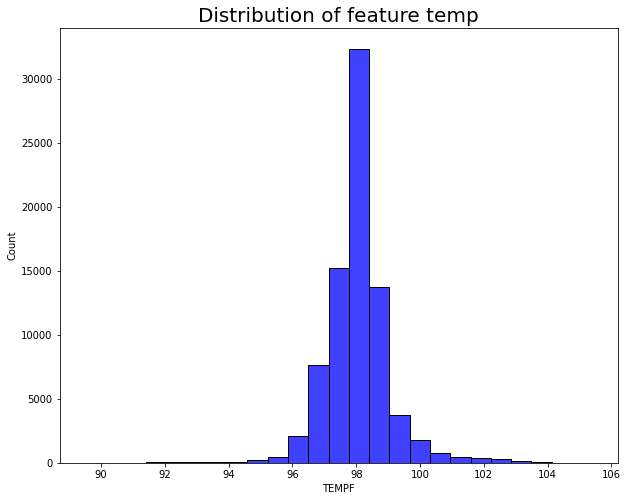

In [7]:
plt.figure(figsize=(fig_X,fig_y))
sns.histplot(x='TEMPF',data=score_df,color=color,bins=bins);
plt.title("Distribution of feature temp",{'fontsize':title_size});

### **Some Facts about TEMPF Feature 👇**
### The ideal temperature of human body is 98.6F(37C).
### For adults body temp can be between 97F to 99F and for chidrens/babies have higher range between 97.9 to 100F
### Looking after data most of the patients have ideal(healthy) body temperature.

### 2]Pulse Rate

Text(0.5, 1.0, 'Distribution of feature PULSE')

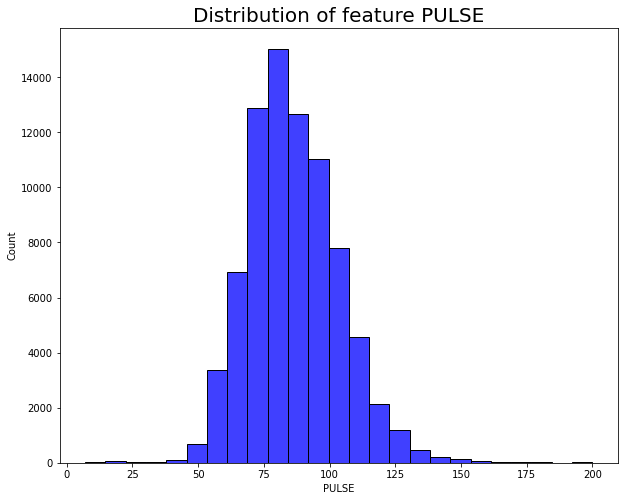

In [8]:
plt.figure(figsize=(fig_X,fig_y))
sns.histplot(x='PULSE',data=score_df,bins=bins,color=color);
plt.title("Distribution of feature PULSE",{'fontsize':title_size})

### **Some Facts about PULSE feature 👇**
### The feature pulse is all about pulse rate of human body or it also called as heart rate. It is basically no of times your heart
### beats per minutes.
### Pulse rate for healthy person is 60 to 100 beats/min.
### Pulse rate normal when you are at rest and increases when you exercise(more oxygen rich blood is needed by the body)
### Ideal pulse rate for children is 70 to 100 beats/min and for adults 60 to 100 beats/min.
### The highest pulse rate achieved during maximal exercise.
### **Formula to calculate maximum pulse rate :**
### maximum heart rate = 200 - your age
### **Looking towards our dataset most of patients are healthy** 😀😀

### Respiration

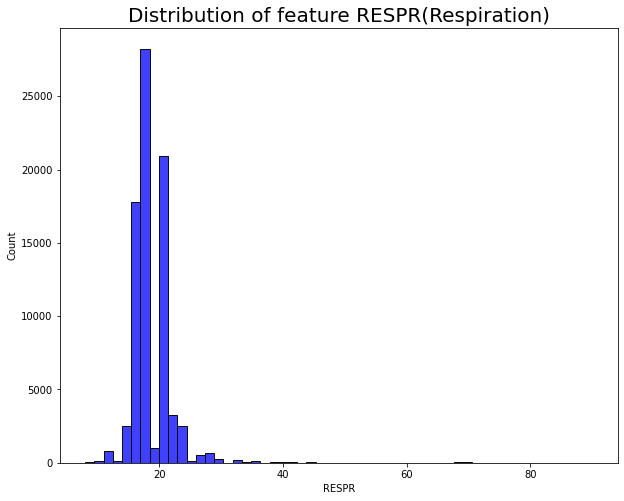

In [9]:
plt.figure(figsize=(fig_X,fig_y))
sns.histplot(x='RESPR',data=score_df,bins=bins+30,color=color);
plt.title("Distribution of feature RESPR(Respiration)",{'fontsize':title_size});

### **Some facts about RESPR feature 👇**
### Respiration means breaths per minutes.
### The rate measures when a person rest by counting no of breaths per minutes by counting how many times the chest rises.

### 4]Systolic BP and Diastolic BP

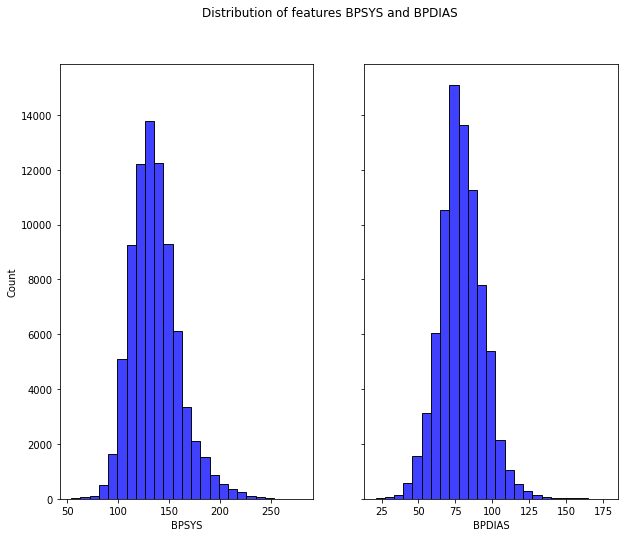

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(fig_X, fig_y), sharey=True);
fig.suptitle('Distribution of features BPSYS and BPDIAS');
sns.histplot(ax=axes[0],x='BPSYS',data=score_df,bins=bins,color=color);
sns.histplot(ax=axes[1],x='BPDIAS',data=score_df,bins=bins,color=color);

### **Some facts about BPSYS(Systolic Blood Pressure) and BPDIAS(Diastolic Blood Pressure) 👇👇👇**
### Systolic blood pressure means maximum pressure attend by human body.
### Diastolic blood pressure means minimum level it reaches between breaths.
### Normal BPSYS is 120 to 129 mmHg and BPDIAS is 80 to 84 mmHg.
### High blood pressure is anything above 140/90 mmHg(here 140 is BPSYS & 90 is BPDIAS).A blood pressure reading over 180/120 is dangerous high. Its also called **Hypertensive Crisis**.

### 5]Oxygen Saturation

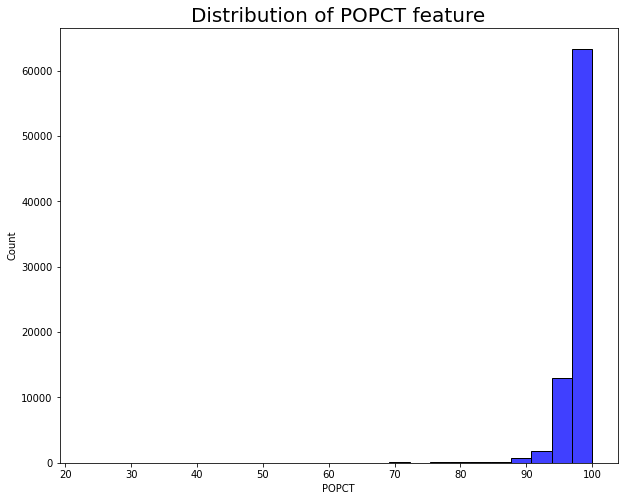

In [11]:
plt.figure(figsize=(fig_X,fig_y))
sns.histplot(x='POPCT',data=score_df,color=color,bins=bins);
plt.title("Distribution of POPCT feature",{'fontsize':title_size});

### **Some facts about POPCT(Oxygen Saturation) 👇👇👇**
### POPCT means how much oxygen the haemoglobin in your body is carrying.
### Normal saturation is 75 to 100 mmHg.

### Some other plots

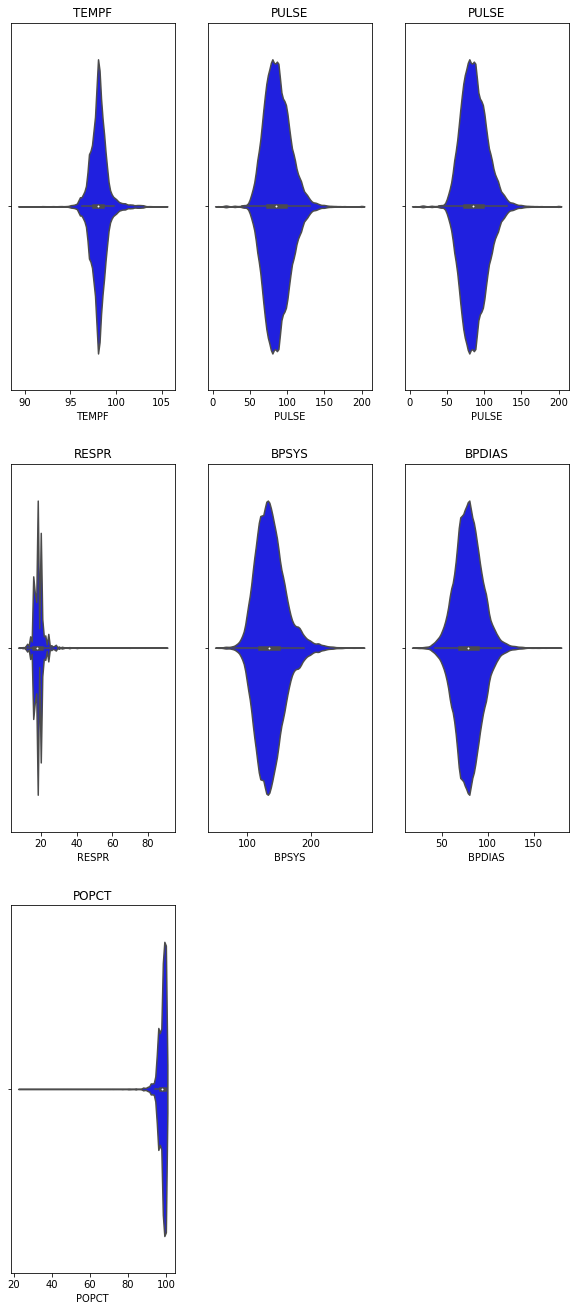

In [12]:
fig, axes = plt.subplots(3, 3, figsize=(fig_X, fig_y+15), sharey=True);
sns.violinplot(ax=axes[0][0],x='TEMPF',data=score_df,color=color);
axes[0][0].set_title('TEMPF');
sns.violinplot(ax=axes[0][1],x='PULSE',data=score_df,color=color);
axes[0][1].set_title('PULSE');
sns.violinplot(ax=axes[0][2],x='PULSE',data=score_df,color=color);
axes[0][2].set_title('PULSE');
sns.violinplot(ax=axes[1][0],x='RESPR',data=score_df,color=color);
axes[1][0].set_title('RESPR');
sns.violinplot(ax=axes[1][1],x='BPSYS',data=score_df,color=color);
axes[1][1].set_title('BPSYS');
sns.violinplot(ax=axes[1][2],x='BPDIAS',data=score_df,color=color);
axes[1][2].set_title('BPDIAS');
sns.violinplot(ax=axes[2][0],x='POPCT',data=score_df,color=color);
axes[2][0].set_title('POPCT');
fig.delaxes(axes[2][1])
fig.delaxes(axes[2][2])

### Split data into dependent and independent variable

In [13]:
X = score_df.drop('SCORE',axis=1)
y = score_df.SCORE

## **Split Data into Training and Testing**

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=11)

## **Data Normalization**

In [15]:
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

## **Model Creation**

In [16]:
model_name = list()
accuracy = list()
models = {
    LogisticRegression(max_iter=500):'Logistic Regression',
    SVC():"Support Vector Machine",
    RandomForestClassifier():'Random Forest'
}
for m in models.keys():
    m.fit(X_train,y_train)
for model,name in models.items():
     print(f"Accuracy Score for {name} is : ",model.score(X_test,y_test)*100,"%")
     model_name.append(name)
     accuracy.append(model.score(X_test,y_test)*100)

Accuracy Score for Logistic Regression is :  71.12773447322101 %
Accuracy Score for Support Vector Machine is :  93.04752325873774 %
Accuracy Score for Random Forest is :  100.0 %


### **Classification Report**

In [17]:
for model,name in models.items():
    y_pred = model.predict(X_test)
    print(f"Classification Report for {name}")  
    print("----------------------------------------------------------")
    print(classification_report(y_test,y_pred))
    print("----------------------------------------------------------")

Classification Report for Logistic Regression
----------------------------------------------------------
              precision    recall  f1-score   support

           0       0.78      0.91      0.84      7488
           1       0.61      0.66      0.63      4321
           2       0.34      0.05      0.09      1959
           3       0.71      0.74      0.72      2140

    accuracy                           0.71     15908
   macro avg       0.61      0.59      0.57     15908
weighted avg       0.67      0.71      0.67     15908

----------------------------------------------------------
Classification Report for Support Vector Machine
----------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      7488
           1       0.90      0.91      0.91      4321
           2       0.83      0.80      0.82      1959
           3       0.94      0.92      0.93      2140

    accuracy         

### **Confusion Matrix**

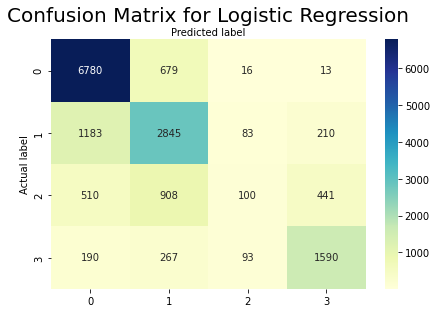

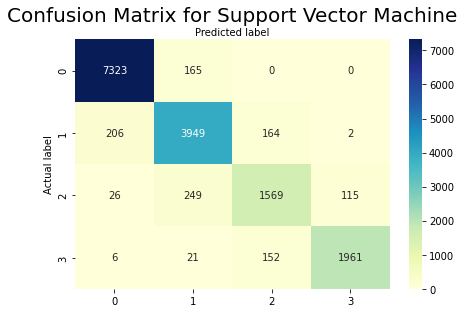

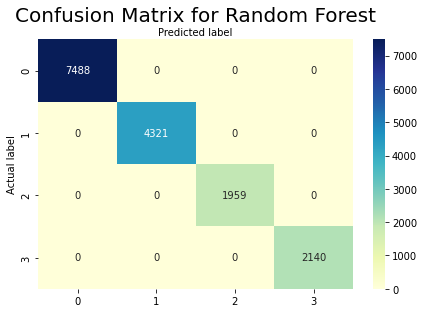

In [18]:
for model,name in models.items():
    y_pred = model.predict(X_test)
    class_names = [0,1]
    fig,ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks,class_names)
    plt.yticks(tick_marks,class_names)

    cnf_matrix = confusion_matrix(y_test,y_pred)
    sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'YlGnBu',
                fmt = 'g')
    ax.xaxis.set_label_position('top')
    plt.tight_layout()
    plt.title(f'Confusion Matrix for {name}', {'fontsize':20})
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

## **Accuracy of Each model**

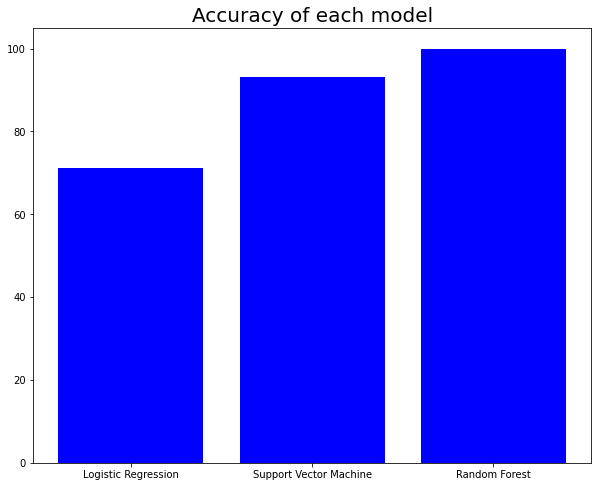

In [19]:
plt.figure(figsize=(fig_X,fig_y))
plt.bar(model_name,accuracy,color=color);
plt.title("Accuracy of each model",{'fontsize':title_size});